## Texturas


Procesando: img1.jpg

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 267.3858
Homogeneidad: 0.1226
Energía: 0.0291
Correlación: 0.8944


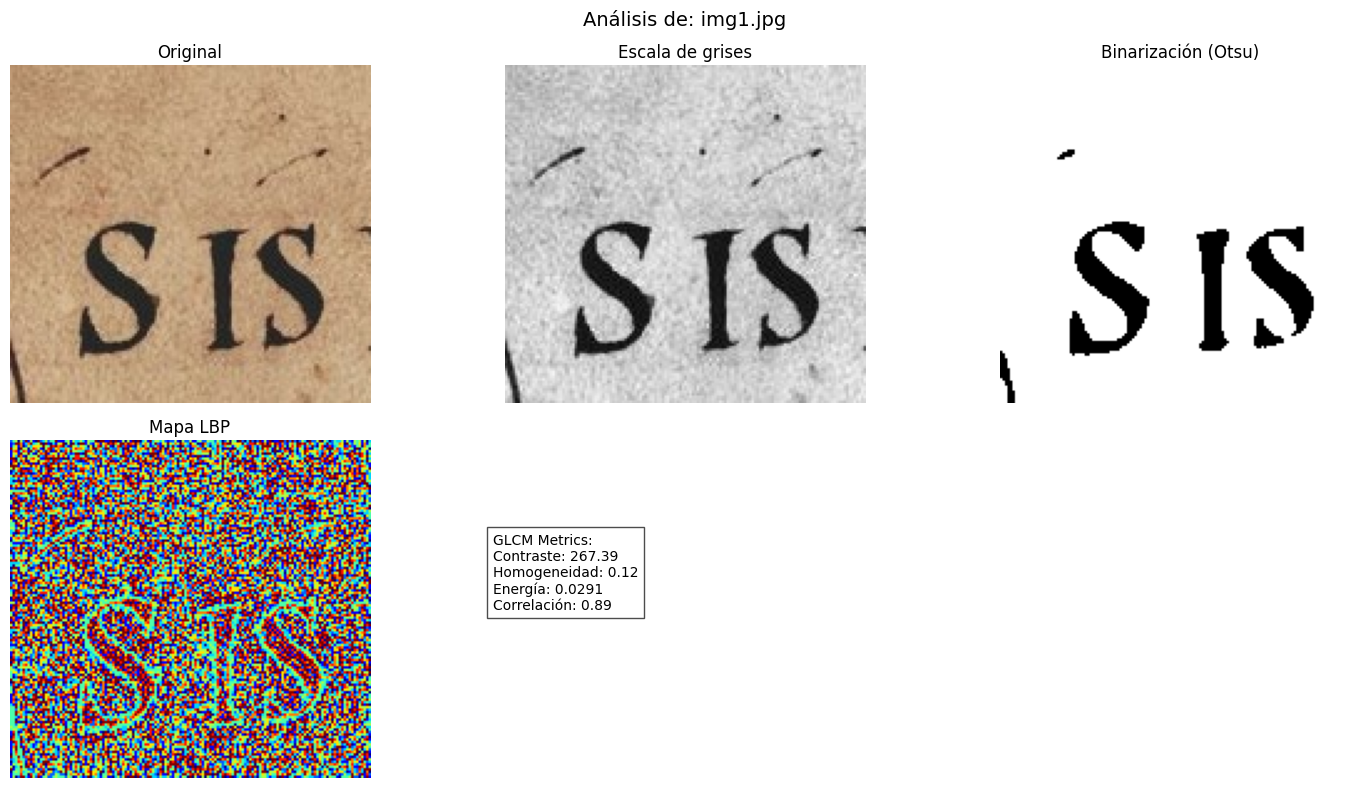

Procesamiento completado para: img1.jpg
Resultados guardados en: resultados/img1/

Procesando: img2.jpg

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 673.7454
Homogeneidad: 0.6032
Energía: 0.5100
Correlación: 0.9344


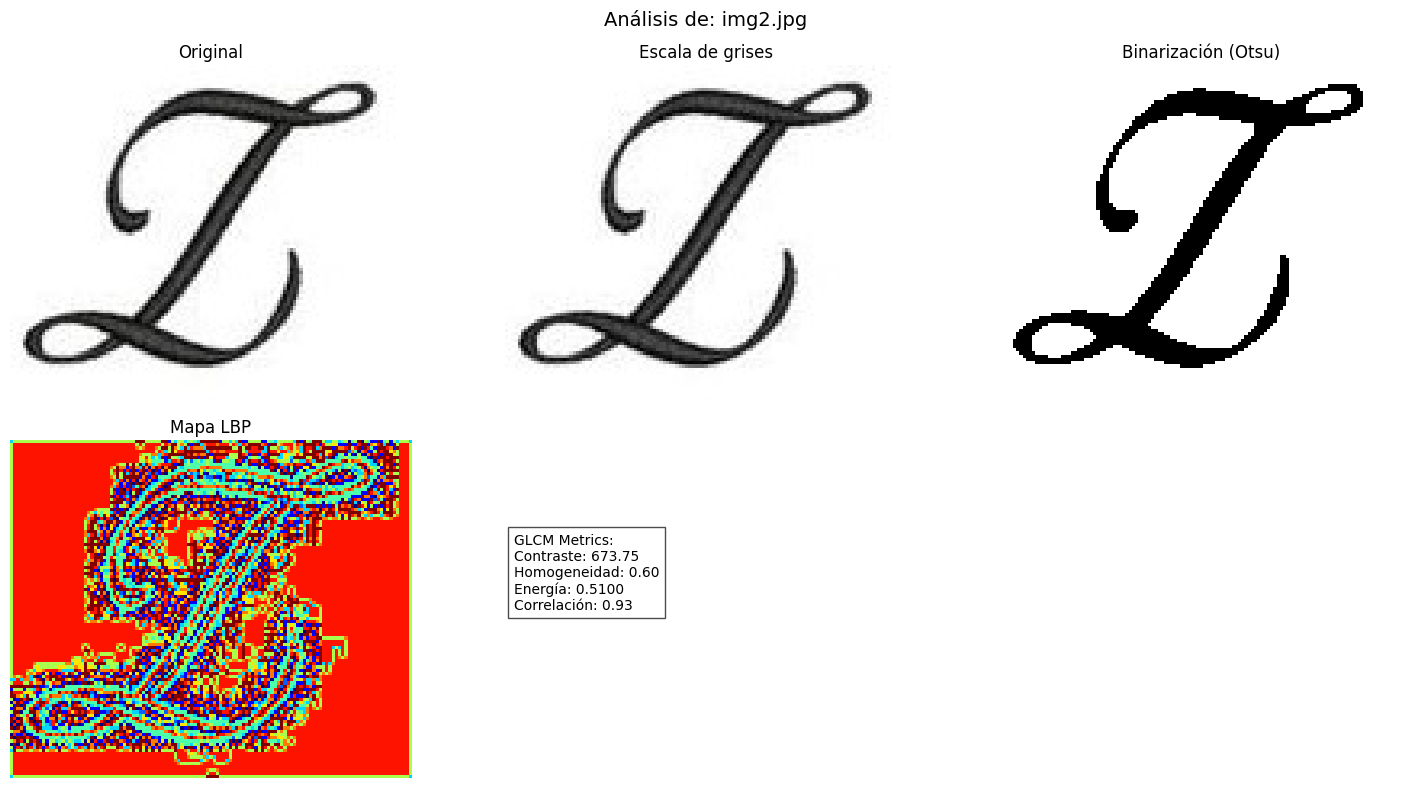

Procesamiento completado para: img2.jpg
Resultados guardados en: resultados/img2/

Procesando: img3.jpeg

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 0.8289
Homogeneidad: 0.7849
Energía: 0.1286
Correlación: 0.9973


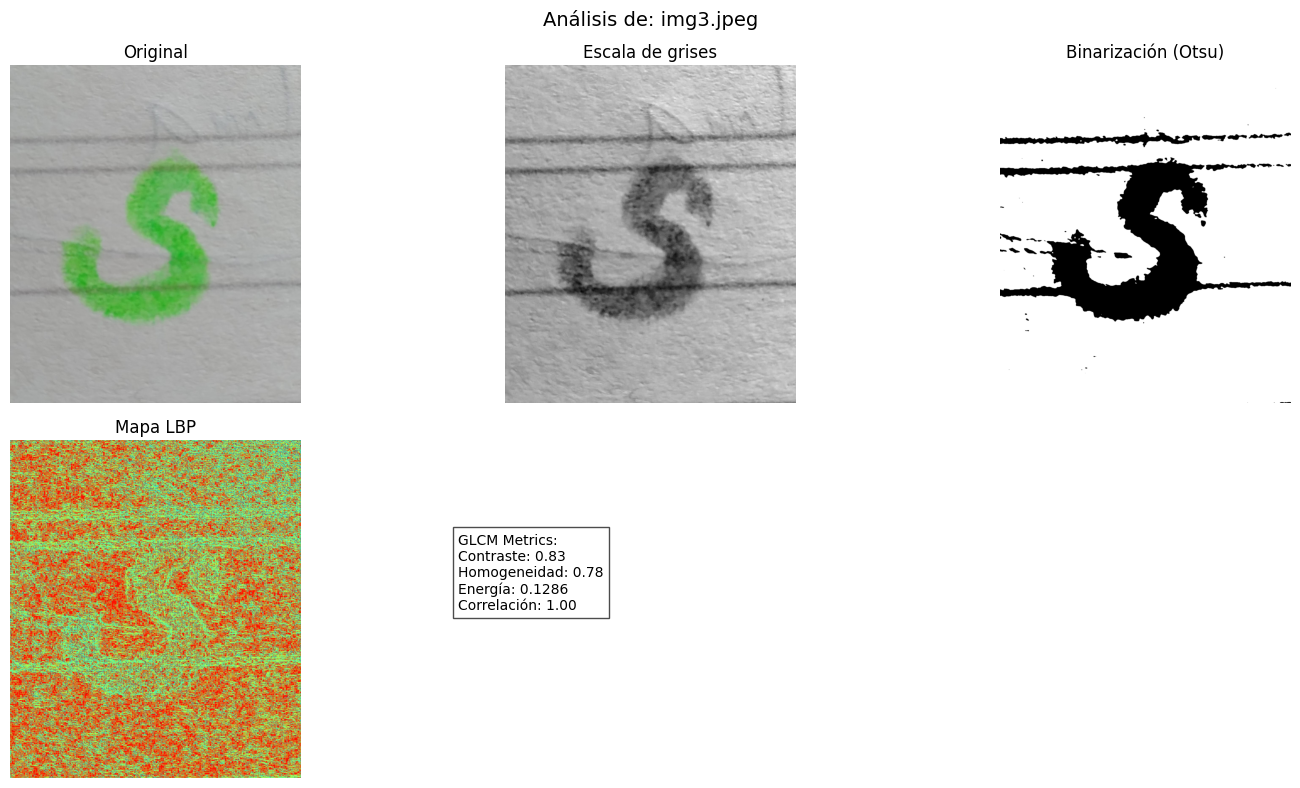

Procesamiento completado para: img3.jpeg
Resultados guardados en: resultados/img3/

Procesando: img4.jpeg

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 0.5390
Homogeneidad: 0.8351
Energía: 0.1139
Correlación: 0.9989


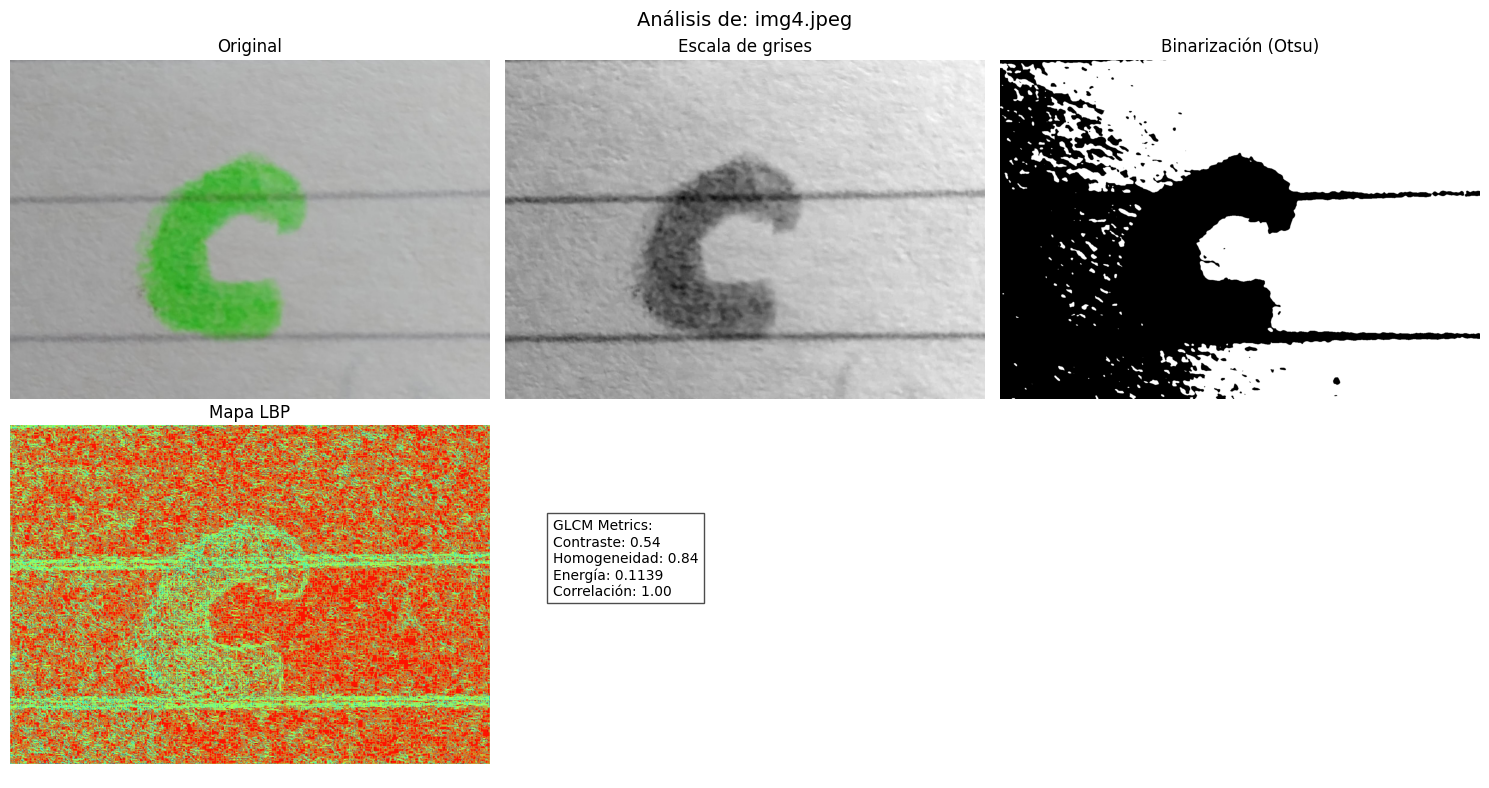

Procesamiento completado para: img4.jpeg
Resultados guardados en: resultados/img4/

Procesando: img5.jpeg

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 1.0767
Homogeneidad: 0.8916
Energía: 0.1649
Correlación: 0.9994


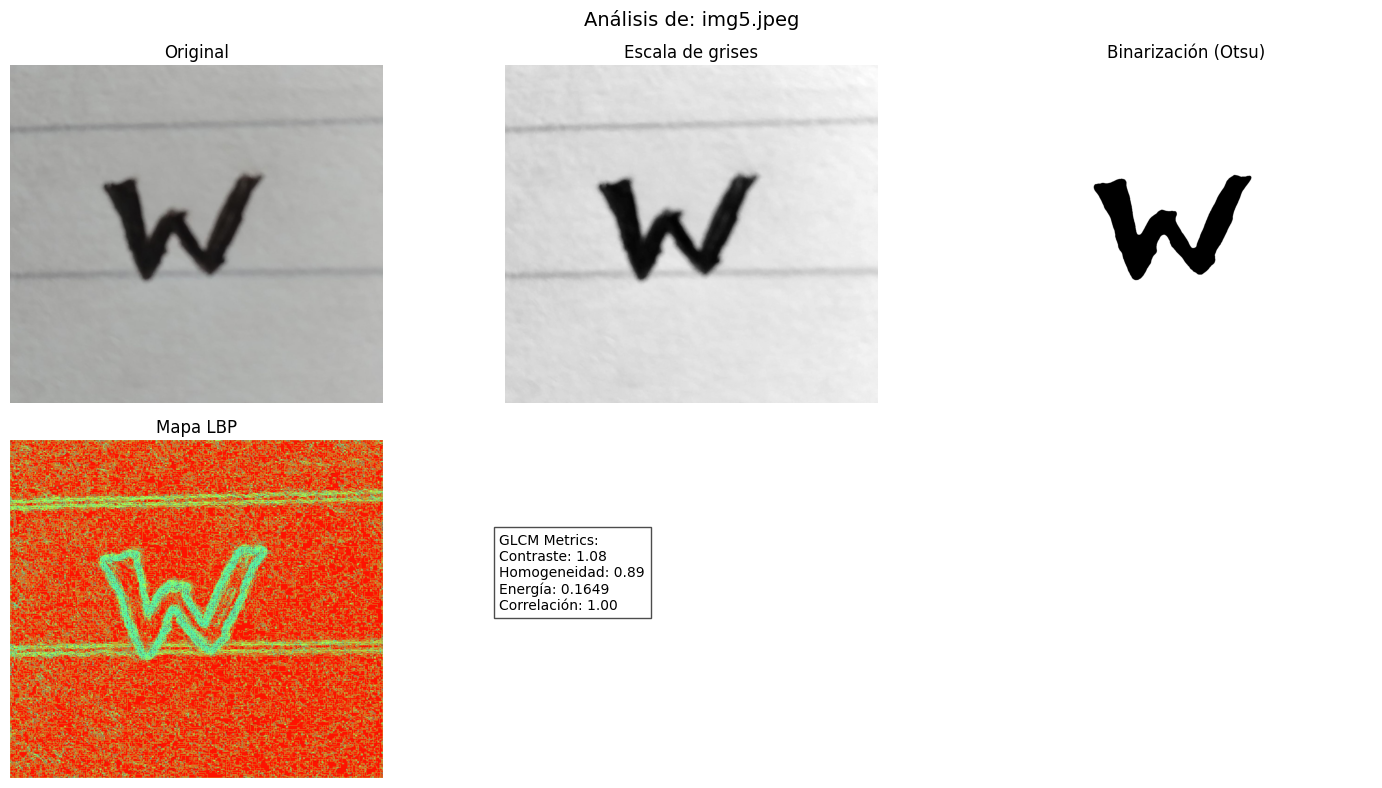

Procesamiento completado para: img5.jpeg
Resultados guardados en: resultados/img5/

Procesando: img6.jpeg

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 0.4655
Homogeneidad: 0.9315
Energía: 0.1430
Correlación: 0.9993


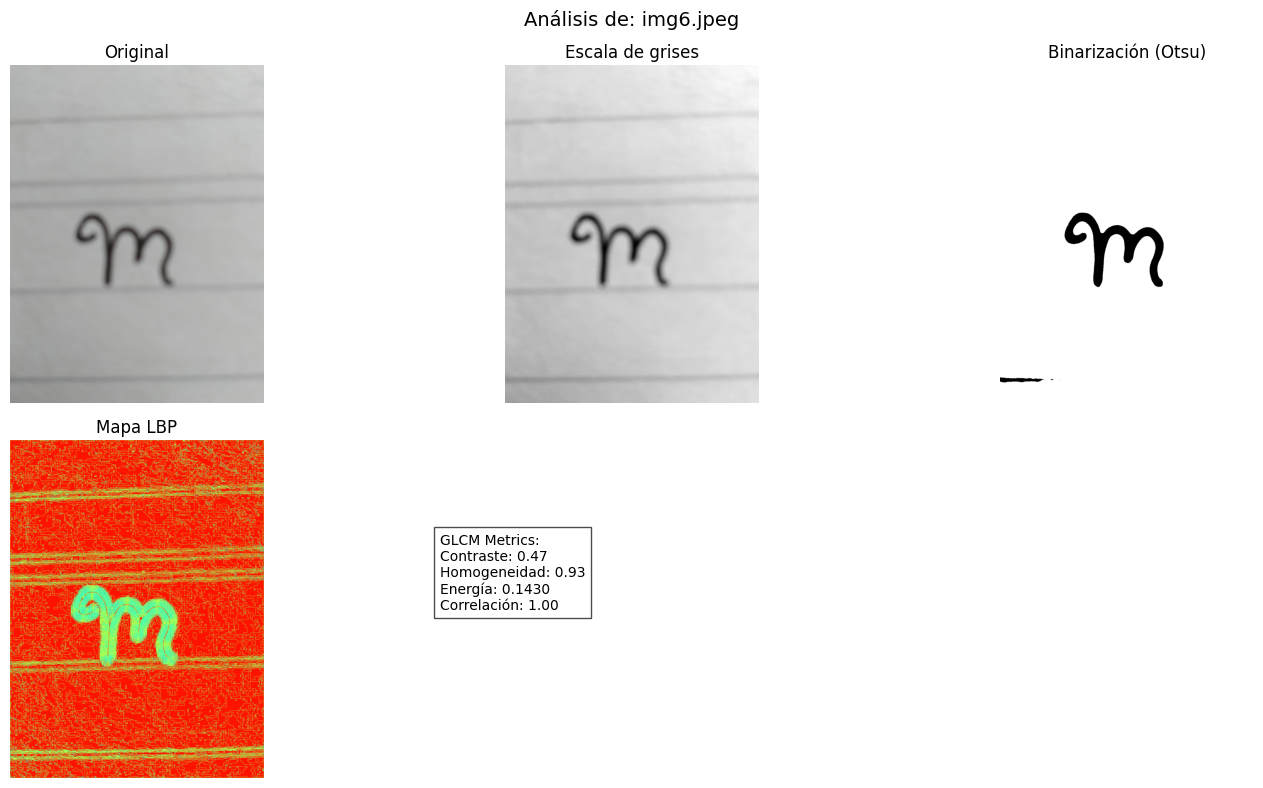

Procesamiento completado para: img6.jpeg
Resultados guardados en: resultados/img6/

Procesando: img7.jpeg

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 0.6984
Homogeneidad: 0.8840
Energía: 0.1544
Correlación: 0.9987


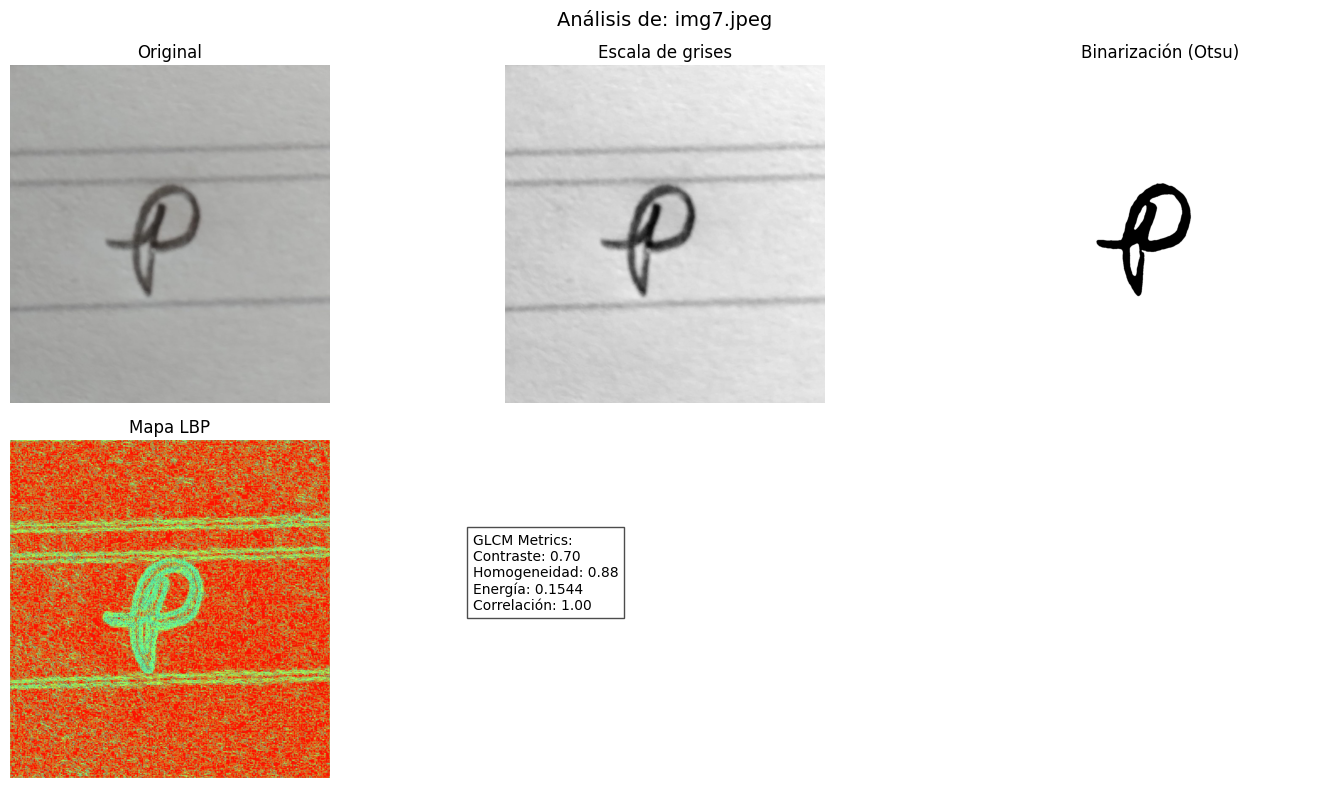

Procesamiento completado para: img7.jpeg
Resultados guardados en: resultados/img7/

¡Procesamiento de todas las imágenes completado!


In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

# Lista de imágenes a procesar
imagenes = ['img1.jpg', 'img2.jpg', 'img3.jpeg', 'img4.jpeg', 'img5.jpeg', 'img6.jpeg', 'img7.jpeg']

# Crear directorio de resultados si no existe
os.makedirs('resultados', exist_ok=True)

for nombre_img in imagenes:
    try:
        # Crear directorio para los resultados de esta imagen
        img_name = os.path.splitext(nombre_img)[0]
        img_dir = f'resultados/{img_name}'
        os.makedirs(img_dir, exist_ok=True)
        
        print(f"\n{'='*50}")
        print(f"Procesando: {nombre_img}")
        print(f"{'='*50}")
        
        # 1. Cargar y preprocesar imagen
        img = cv2.imread(nombre_img)
        if img is None:
            print(f"Error: No se pudo cargar la imagen {nombre_img}")
            continue
            
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Aplicar filtros
        median = cv2.medianBlur(gray, 3)
        bilateral = cv2.bilateralFilter(median, d=9, sigmaColor=75, sigmaSpace=75)
        
        # Binarización con Otsu
        _, thresh = cv2.threshold(bilateral, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Operación morfológica
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        
        # 2. Extracción de características (Textura)
        # --- A. LBP (Local Binary Pattern) ---
        lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
        
        # --- B. GLCM (Haralick Features) ---
        glcm = graycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
        
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        
        # Mostrar métricas
        print("\n===== MÉTRICAS DE TEXTURA (GLCM) =====")
        print(f"Contraste: {contrast:.4f}")
        print(f"Homogeneidad: {homogeneity:.4f}")
        print(f"Energía: {energy:.4f}")
        print(f"Correlación: {correlation:.4f}")
        print("="*40)
        
        # 3. Guardar resultados
        # Guardar imágenes procesadas
        cv2.imwrite(f"{img_dir}/0_original.jpg", img)
        cv2.imwrite(f"{img_dir}/1_gray.jpg", gray)
        cv2.imwrite(f"{img_dir}/2_median.jpg", median)
        cv2.imwrite(f"{img_dir}/3_bilateral.jpg", bilateral)
        cv2.imwrite(f"{img_dir}/4_threshold.jpg", thresh)
        cv2.imwrite(f"{img_dir}/5_morphology.jpg", morph)
        
        # Guardar mapa LBP
        lbp_normalized = (lbp * 255 / lbp.max()).astype(np.uint8)
        cv2.imwrite(f'{img_dir}/6_lbp_texture.jpg', lbp_normalized)
        
        # Guardar métricas GLCM
        with open(f'{img_dir}/glcm_metrics.txt', 'w') as f:
            f.write("===== MÉTRICAS DE TEXTURA (GLCM) =====\n")
            f.write(f"Contraste: {contrast:.4f}\n")
            f.write(f"Homogeneidad: {homogeneity:.4f}\n")
            f.write(f"Energía: {energy:.4f}\n")
            f.write(f"Correlación: {correlation:.4f}\n")
            f.write("="*40 + "\n")
        
        # 4. Visualización
        plt.figure(figsize=(15, 8))
        
        # Mostrar imágenes originales
        plt.subplot(2, 3, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis('off')
        
        plt.subplot(2, 3, 2)
        plt.imshow(gray, cmap='gray')
        plt.title("Escala de grises")
        plt.axis('off')
        
        plt.subplot(2, 3, 3)
        plt.imshow(thresh, cmap='gray')
        plt.title("Binarización (Otsu)")
        plt.axis('off')
        
        # Mostrar resultados de textura
        plt.subplot(2, 3, 4)
        plt.imshow(lbp, cmap='jet')
        plt.title("Mapa LBP")
        plt.axis('off')
        
        # Mostrar métricas como texto
        plt.subplot(2, 3, 5)
        metrics_text = f"GLCM Metrics:\n" \
                      f"Contraste: {contrast:.2f}\n" \
                      f"Homogeneidad: {homogeneity:.2f}\n" \
                      f"Energía: {energy:.4f}\n" \
                      f"Correlación: {correlation:.2f}"
        plt.text(0.1, 0.5, metrics_text, fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.7))
        plt.axis('off')
        
        plt.suptitle(f"Análisis de: {nombre_img}", fontsize=14)
        plt.tight_layout()
        plt.savefig(f"{img_dir}/7_analysis_results.png", dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"Procesamiento completado para: {nombre_img}")
        print(f"Resultados guardados en: {img_dir}/")
        
    except Exception as e:
        print(f"Error procesando {nombre_img}: {str(e)}")

print("\n¡Procesamiento de todas las imágenes completado!")

## Deteción de bordes


Procesando bordes para: resultados


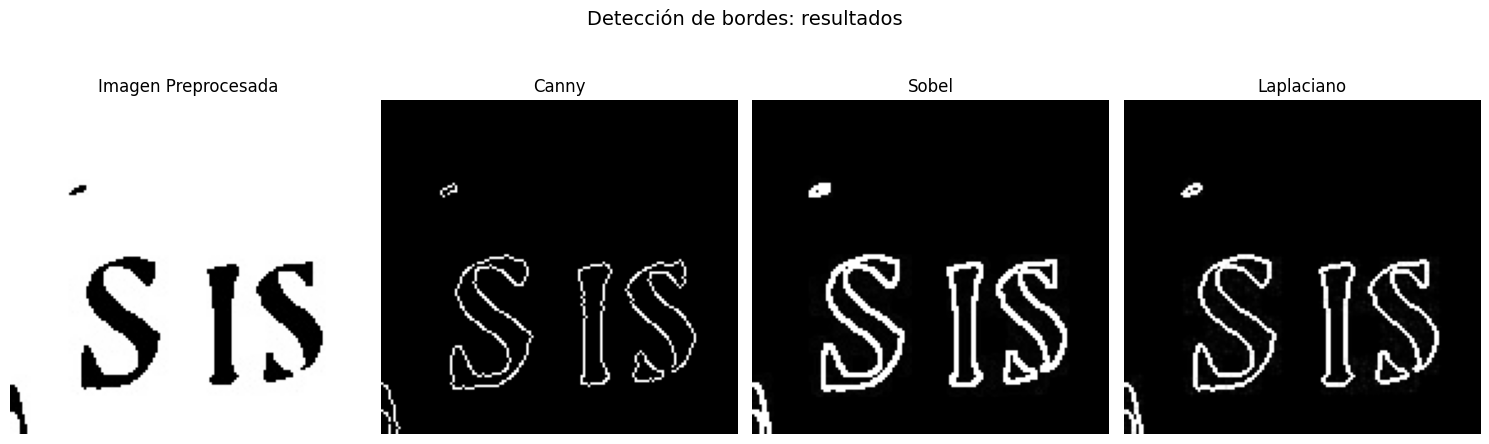

Procesamiento de bordes completado para: resultados
Resultados guardados en: resultados/img1\bordes/

Procesando bordes para: resultados


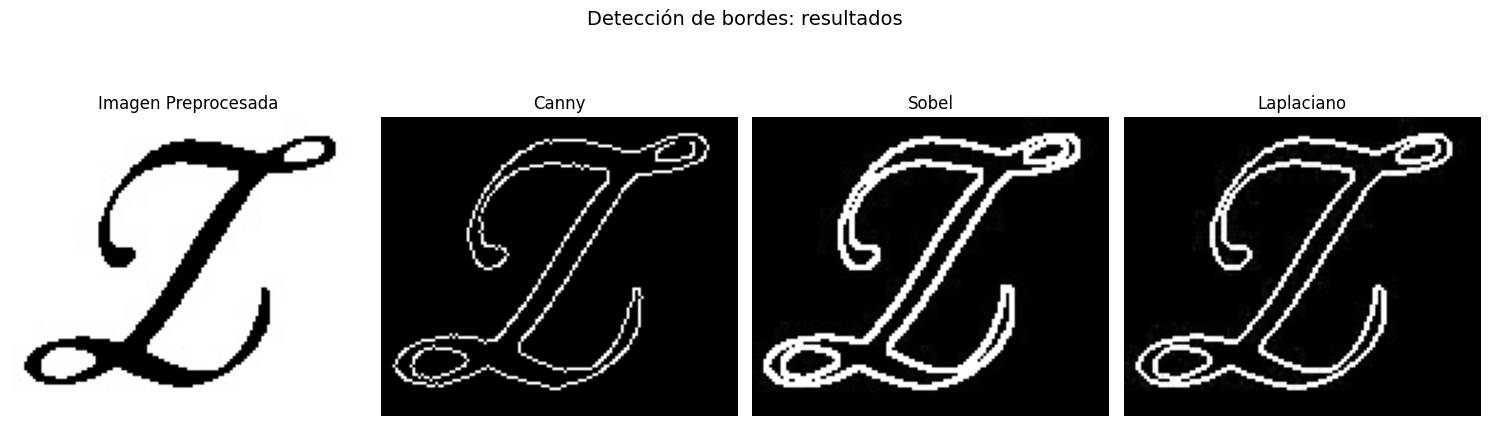

Procesamiento de bordes completado para: resultados
Resultados guardados en: resultados/img2\bordes/

Procesando bordes para: resultados


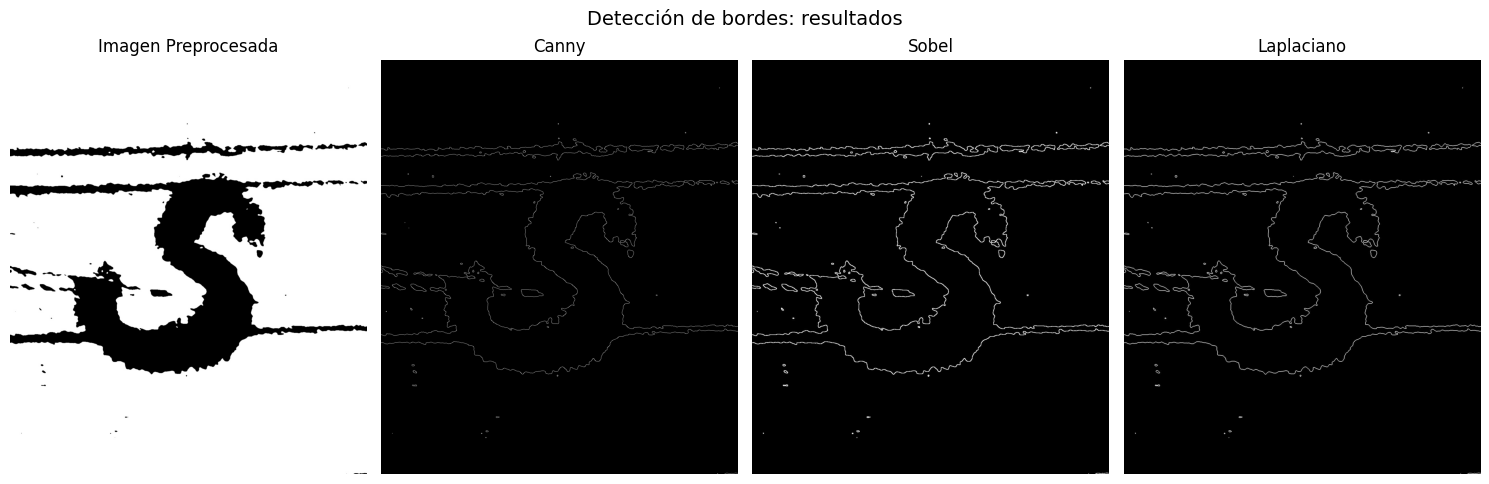

Procesamiento de bordes completado para: resultados
Resultados guardados en: resultados/img3\bordes/

Procesando bordes para: resultados


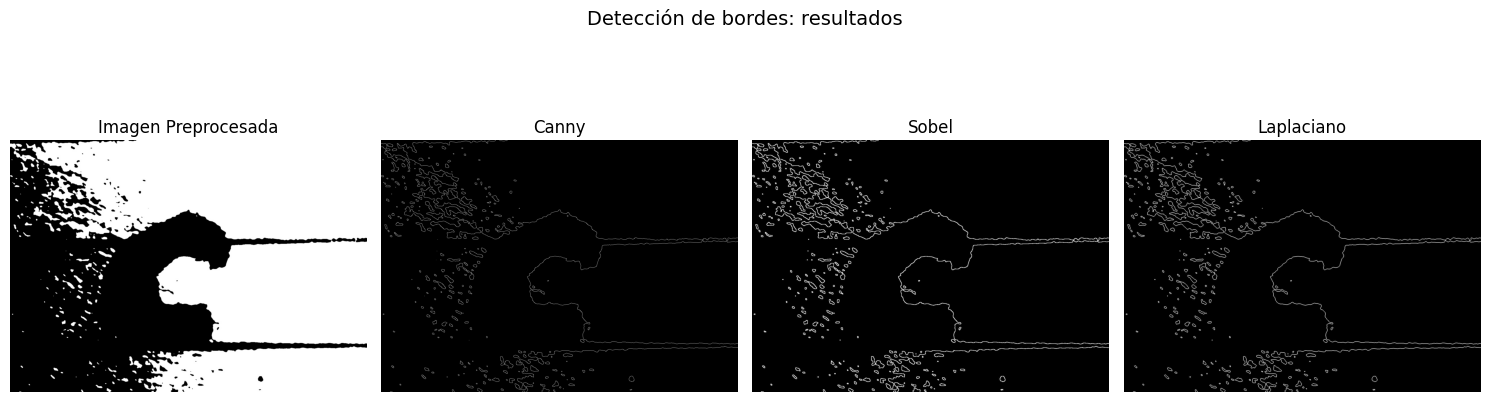

Procesamiento de bordes completado para: resultados
Resultados guardados en: resultados/img4\bordes/

Procesando bordes para: resultados


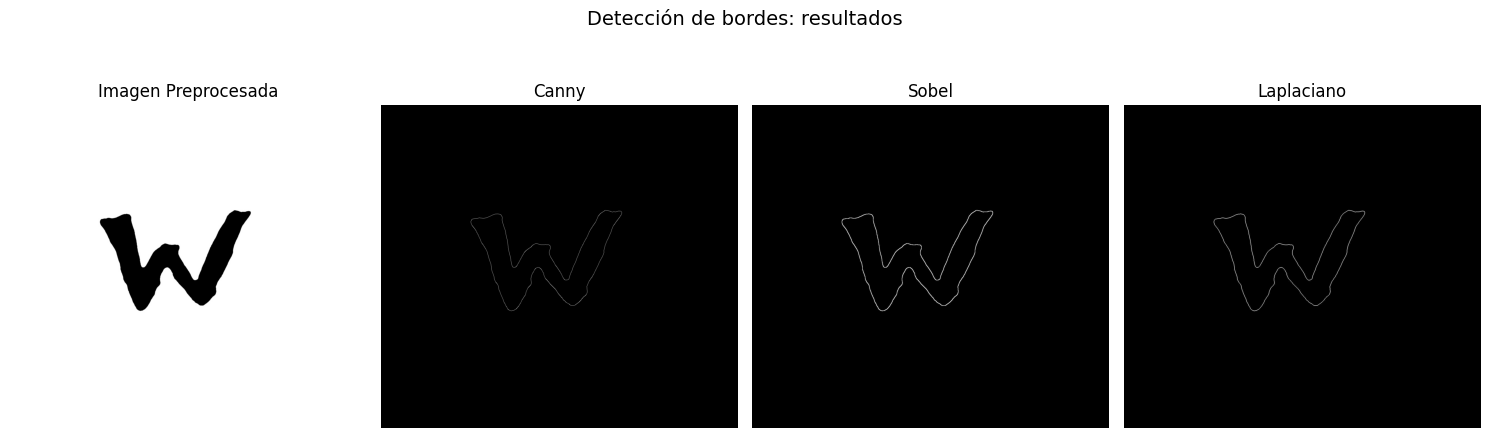

Procesamiento de bordes completado para: resultados
Resultados guardados en: resultados/img5\bordes/

Procesando bordes para: resultados


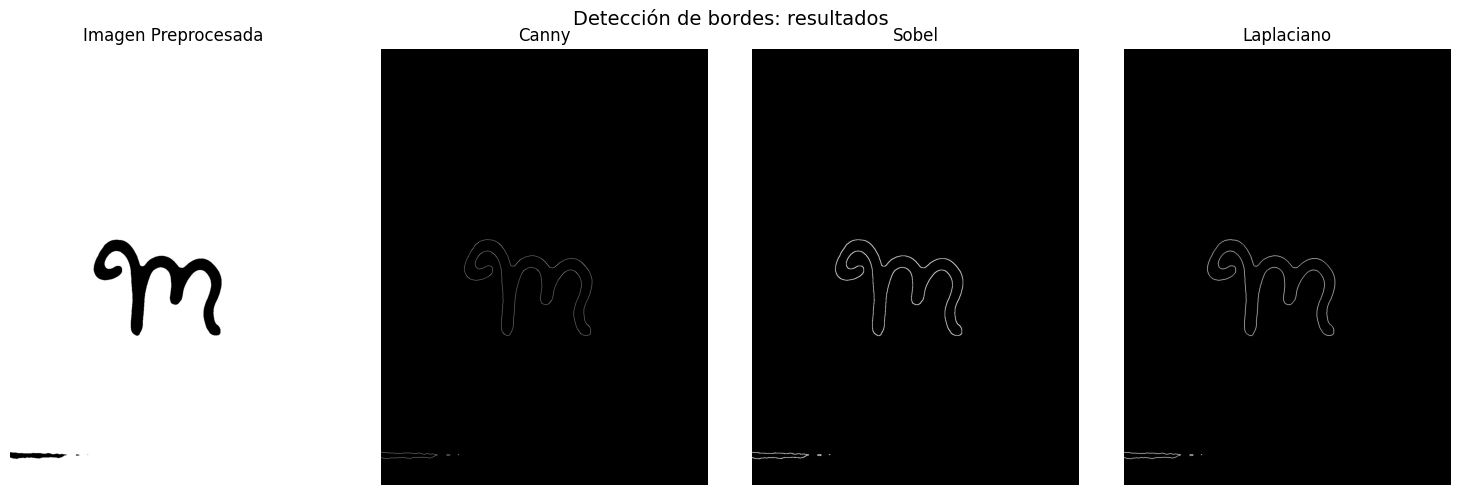

Procesamiento de bordes completado para: resultados
Resultados guardados en: resultados/img6\bordes/

Procesando bordes para: resultados


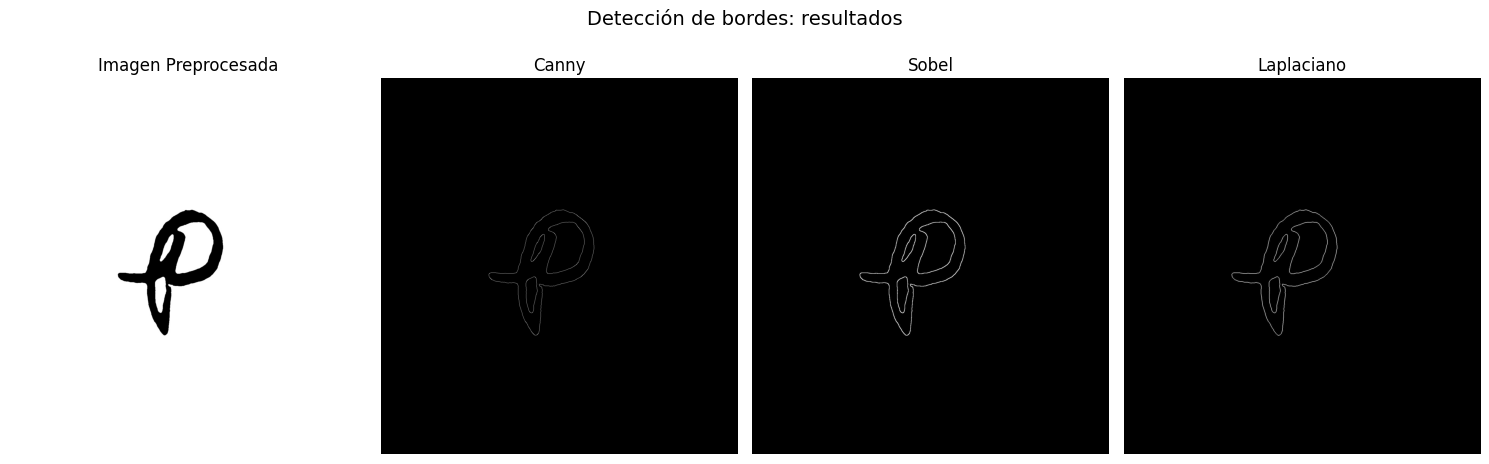

Procesamiento de bordes completado para: resultados
Resultados guardados en: resultados/img7\bordes/

¡Procesamiento de bordes para todas las imágenes completado!


In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Lista de imágenes preprocesadas
imagenes = [
    'resultados/img1/5_morfologia.jpg',
    'resultados/img2/5_morfologia.jpg',
    'resultados/img3/5_morfologia.jpg',
    'resultados/img4/5_morfologia.jpg',
    'resultados/img5/5_morfologia.jpg',
    'resultados/img6/5_morfologia.jpg',
    'resultados/img7/5_morfologia.jpg'
]

for img_path in imagenes:
    try:
        # Extraer el nombre de la imagen de la ruta
        img_name = os.path.basename(os.path.dirname(os.path.dirname(img_path)))
        print(f"\n{'='*50}")
        print(f"Procesando bordes para: {img_name}")
        print(f"{'='*50}")
        
        # 1. Cargar imagen preprocesada
        if not os.path.exists(img_path):
            print(f"Error: No se encontró la imagen preprocesada en {img_path}")
            continue
            
        # Leer la imagen en escala de grises
        gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # 2. Detección de bordes
        # --- Canny ---
        edges_canny = cv2.Canny(gray, threshold1=50, threshold2=150)
        
        # --- Sobel ---
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        sobel = cv2.magnitude(sobelx, sobely)
        sobel = cv2.convertScaleAbs(sobel)
        
        # --- Laplaciano ---
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        laplacian = cv2.convertScaleAbs(laplacian)
        
        # 3. Crear directorio de salida
        output_dir = os.path.join(os.path.dirname(img_path), "bordes")
        os.makedirs(output_dir, exist_ok=True)
        
        # 4. Guardar resultados
        cv2.imwrite(os.path.join(output_dir, "bordes_canny.jpg"), edges_canny)
        cv2.imwrite(os.path.join(output_dir, "bordes_sobel.jpg"), sobel)
        cv2.imwrite(os.path.join(output_dir, "bordes_laplaciano.jpg"), laplacian)
        
        # 5. Mostrar resultados
        titles = ['Imagen Preprocesada', 'Canny', 'Sobel', 'Laplaciano']
        images = [gray, edges_canny, sobel, laplacian]
        
        plt.figure(figsize=(15, 5))
        for i in range(4):
            plt.subplot(1, 4, i+1)
            plt.imshow(images[i], cmap='gray')
            plt.title(titles[i])
            plt.axis('off')
        
        plt.suptitle(f"Detección de bordes: {img_name}", fontsize=14)
        plt.tight_layout()
        
        # Guardar figura comparativa
        plt.savefig(os.path.join(output_dir, "comparacion_bordes.jpg"), dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"Procesamiento de bordes completado para: {img_name}")
        print(f"Resultados guardados en: {output_dir}/")
        
    except Exception as e:
        print(f"Error procesando {img_path}: {str(e)}")

print("\n¡Procesamiento de bordes para todas las imágenes completado!")

## Formas


Detectando formas en: img1


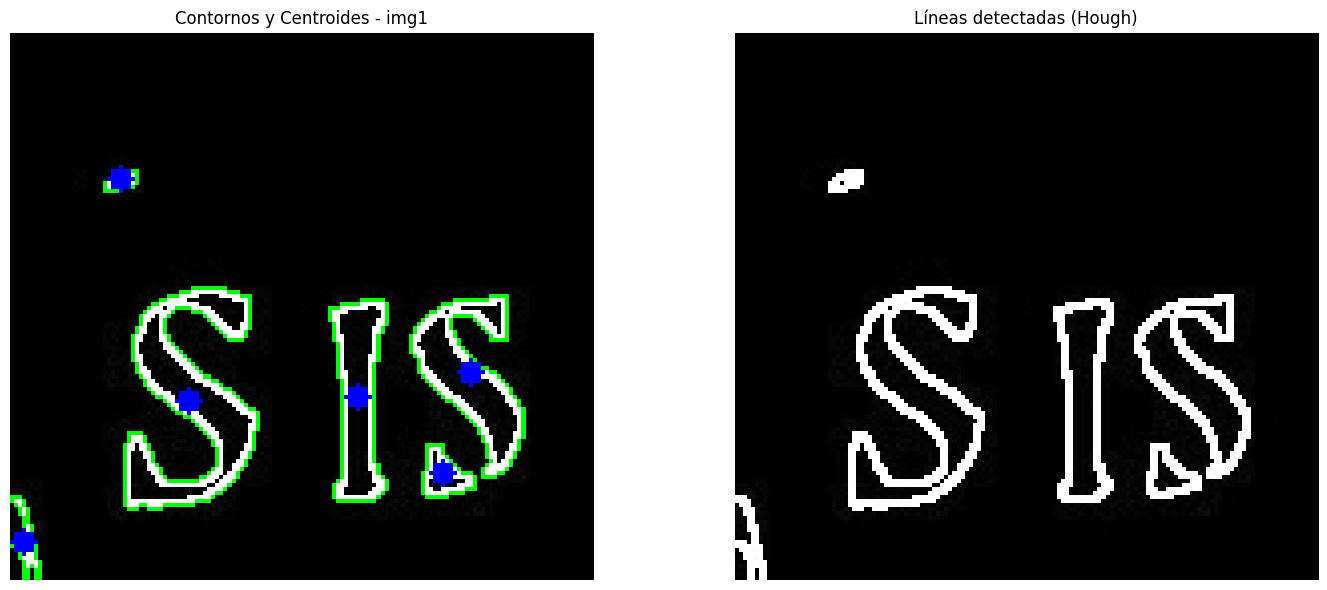

Análisis de formas completado para: img1
Resultados guardados en: resultados/img1\formas/

Detectando formas en: img2


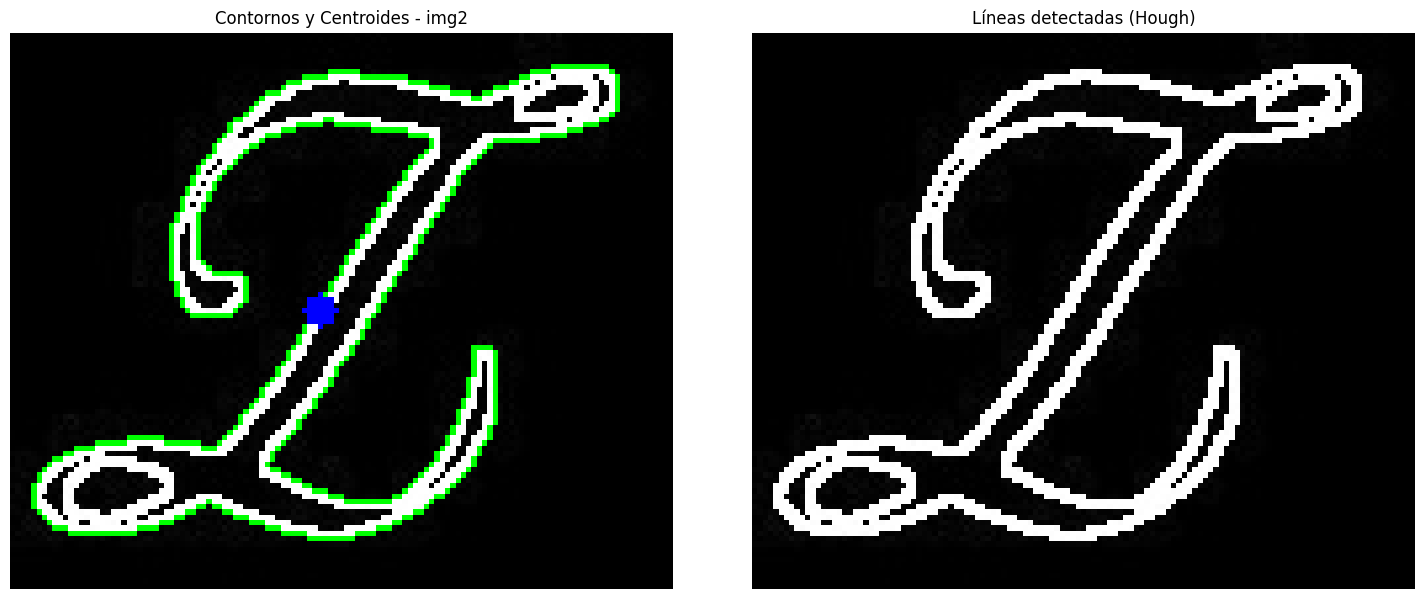

Análisis de formas completado para: img2
Resultados guardados en: resultados/img2\formas/

Detectando formas en: img3


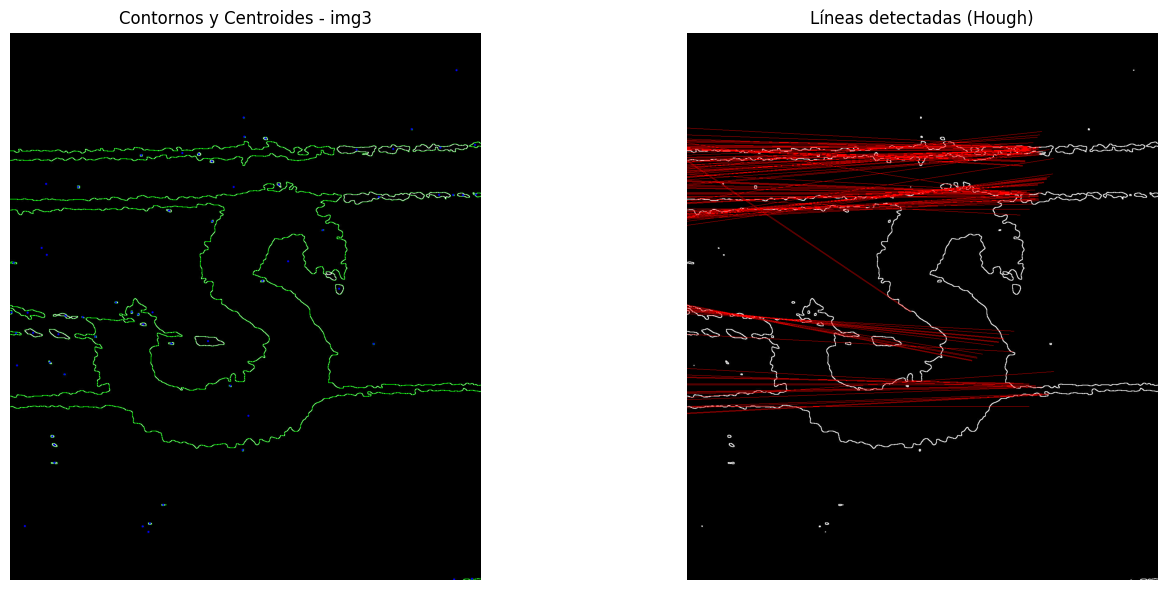

Análisis de formas completado para: img3
Resultados guardados en: resultados/img3\formas/

Detectando formas en: img4


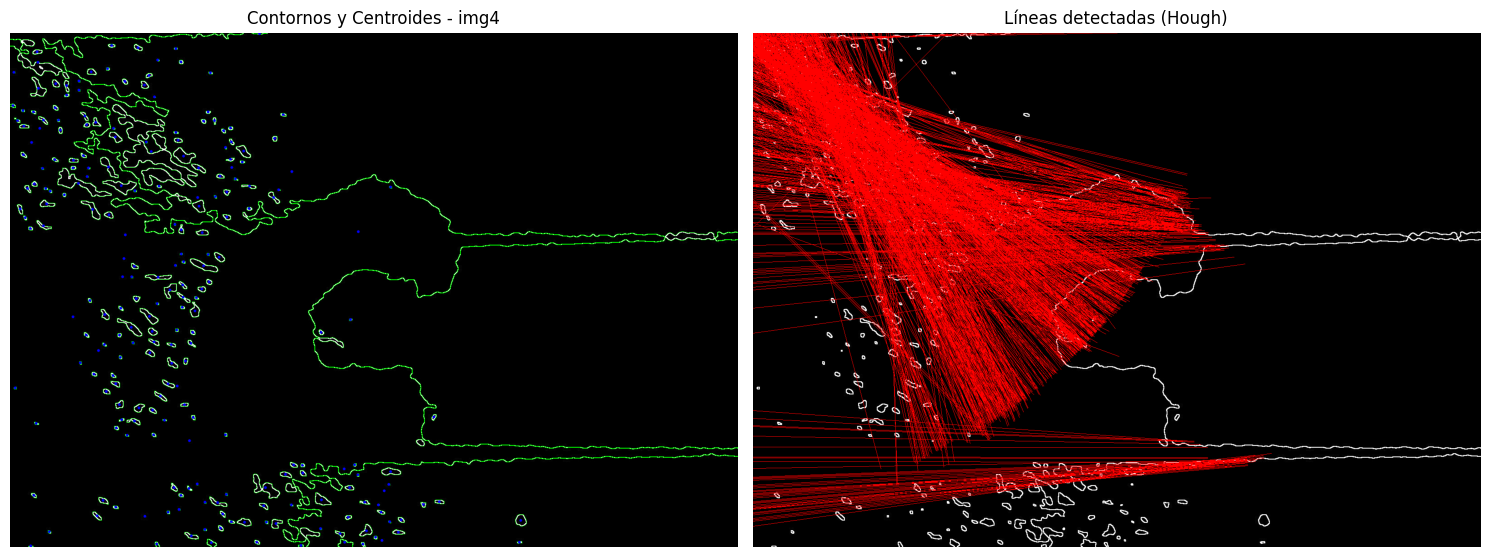

Análisis de formas completado para: img4
Resultados guardados en: resultados/img4\formas/

Detectando formas en: img5


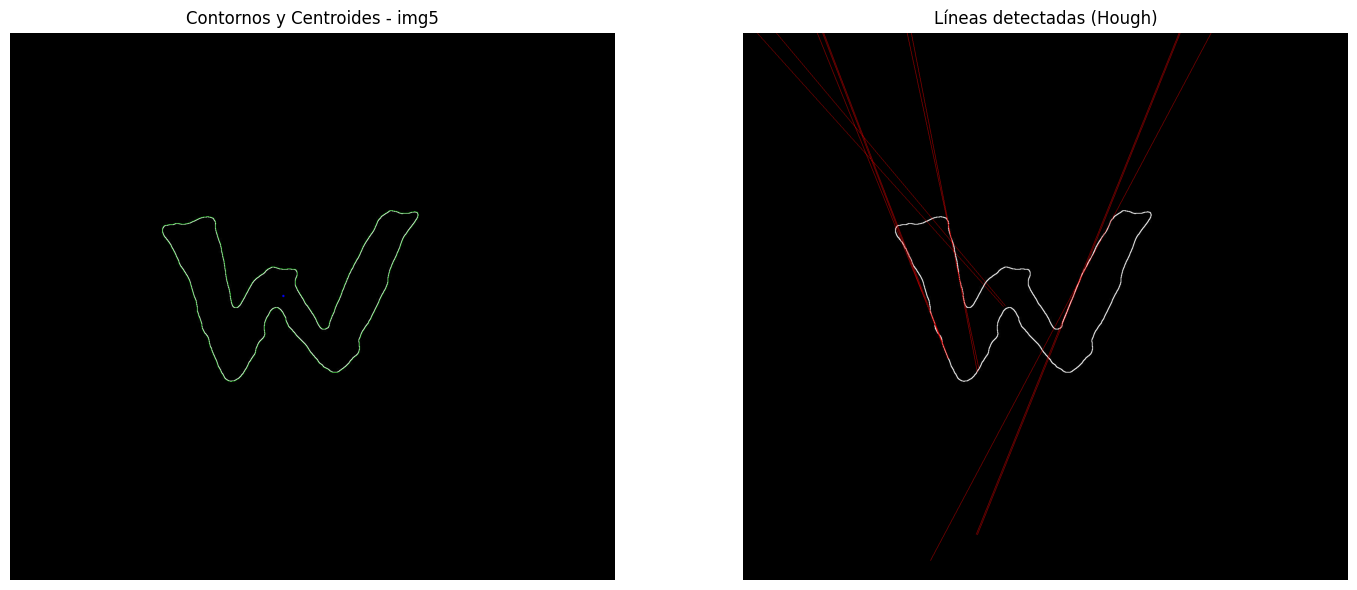

Análisis de formas completado para: img5
Resultados guardados en: resultados/img5\formas/

Detectando formas en: img6


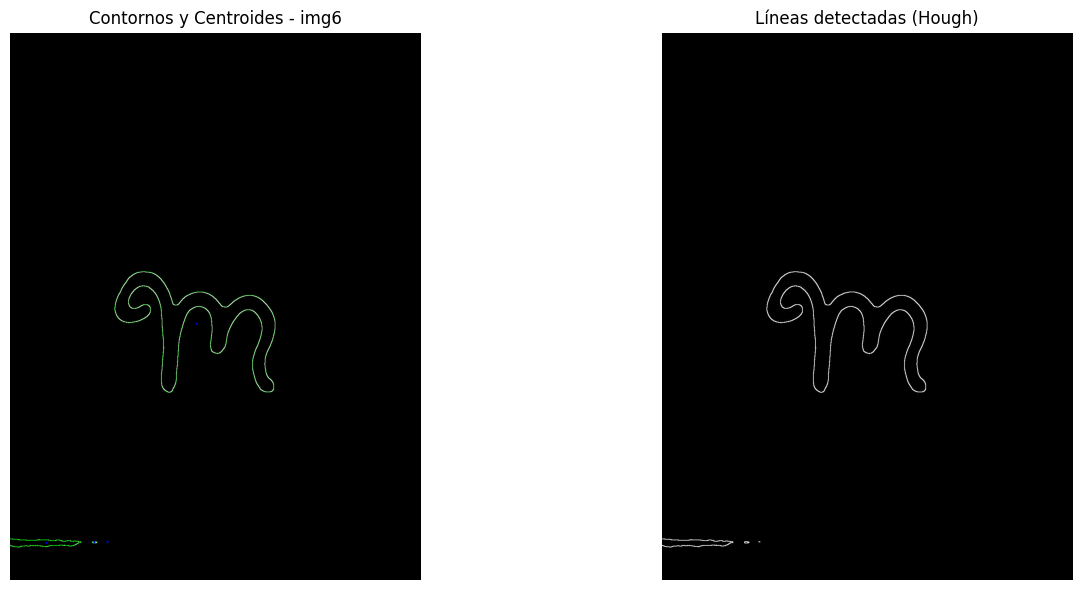

Análisis de formas completado para: img6
Resultados guardados en: resultados/img6\formas/

Detectando formas en: img7


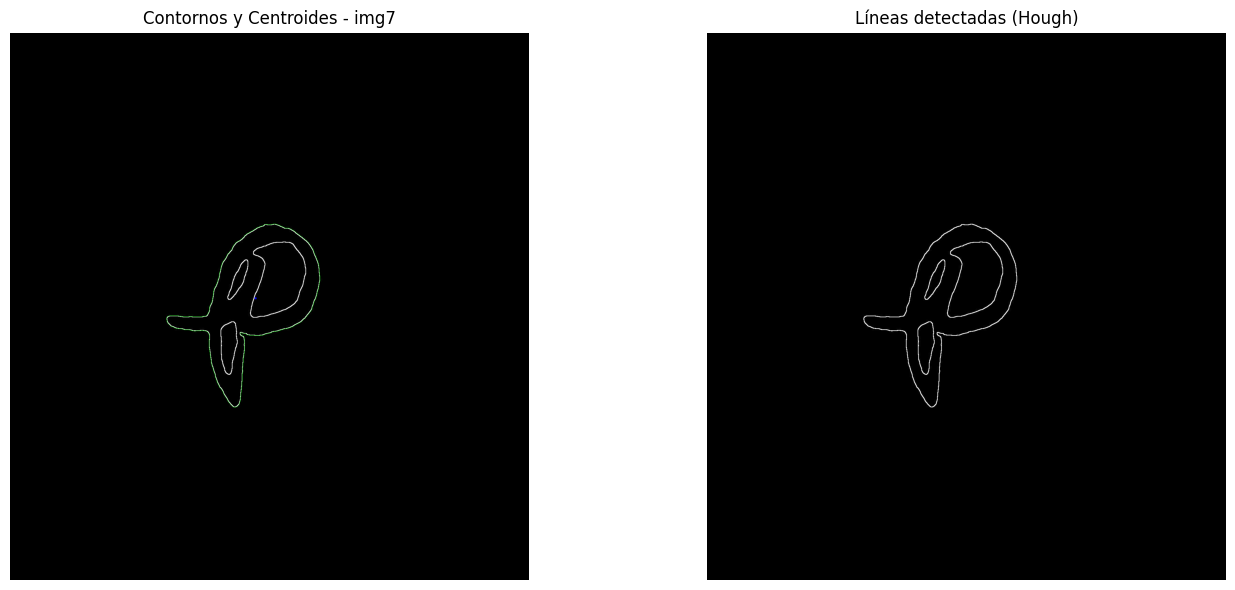

Análisis de formas completado para: img7
Resultados guardados en: resultados/img7\formas/

¡Análisis de formas completado para todas las imágenes!


In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Lista de imágenes de bordes
imagenes_bordes = [
    'resultados/img1/bordes/bordes_sobel.jpg',
    'resultados/img2/bordes/bordes_sobel.jpg',
    'resultados/img3/bordes/bordes_sobel.jpg',
    'resultados/img4/bordes/bordes_sobel.jpg',
    'resultados/img5/bordes/bordes_sobel.jpg',
    'resultados/img6/bordes/bordes_sobel.jpg',
    'resultados/img7/bordes/bordes_sobel.jpg'
]

for img_path in imagenes_bordes:
    try:
        # Extraer el nombre de la imagen de la ruta
        img_name = os.path.basename(os.path.dirname(os.path.dirname(img_path)))
        print(f"\n{'='*50}")
        print(f"Detectando formas en: {img_name}")
        print(f"{'='*50}")
        
        # 1. Cargar imagen de bordes
        if not os.path.exists(img_path):
            print(f"Error: No se encontró la imagen de bordes en {img_path}")
            continue
            
        # Leer la imagen en escala de grises
        gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # 2. Binarización para detectar formas
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # 3. Encontrar contornos
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # 4. Crear imágenes para visualización
        img_contours = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        img_hough = img_contours.copy()
        
        # 5. Dibujar contornos y calcular centroides
        cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 1)
        
        # Archivo para guardar métricas
        output_dir = os.path.join(os.path.dirname(os.path.dirname(img_path)), "formas")
        os.makedirs(output_dir, exist_ok=True)
        metrics_file = os.path.join(output_dir, f"metricas_{img_name}.txt")
        
        with open(metrics_file, 'w') as f:
            f.write(f"=== Métricas de contornos - {img_name} ===\n")
            f.write(f"Número de contornos encontrados: {len(contours)}\n\n")
            
            for i, c in enumerate(contours):
                # Calcular momentos y centroide
                M = cv2.moments(c)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    area = cv2.contourArea(c)
                    perimeter = cv2.arcLength(c, True)
                    
                    # Dibujar centroide
                    cv2.circle(img_contours, (cx, cy), 3, (255, 0, 0), -1)
                    
                    # Escribir métricas
                    f.write(f"Contorno {i+1}:\n")
                    f.write(f"  - Área: {area:.2f} px²\n")
                    f.write(f"  - Perímetro: {perimeter:.2f} px\n")
                    f.write(f"  - Centroide: ({cx}, {cy})\n")
                    f.write("\n")
        
        # 6. Detección de líneas con Hough
        edges = cv2.Canny(gray, 100, 200)
        lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
        
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(img_hough, (x1, y1), (x2, y2), (0, 0, 255), 1)
        
        # 7. Guardar resultados
        cv2.imwrite(os.path.join(output_dir, "contornos_centroides.jpg"), img_contours)
        cv2.imwrite(os.path.join(output_dir, "lineas_hough.jpg"), img_hough)
        
        # 8. Mostrar resultados
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
        plt.title(f"Contornos y Centroides - {img_name}")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img_hough, cv2.COLOR_BGR2RGB))
        plt.title("Líneas detectadas (Hough)")
        plt.axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"analisis_formas_{img_name}.jpg"), dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"Análisis de formas completado para: {img_name}")
        print(f"Resultados guardados en: {output_dir}/")
        
    except Exception as e:
        print(f"Error procesando {img_path}: {str(e)}")

print("\n¡Análisis de formas completado para todas las imágenes!")

## Métodos Avanzados de Características